In [1]:
# loading package

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set(font_scale=1.56)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV


In [5]:
# loading data
df_train = pd.read_csv("C:/Users/USER/Desktop/Github/Python Project/train.csv")
df_test = pd.read_csv("C:/Users/USER/Desktop/Github/Python Project/test.csv")
df_submit = pd.read_csv("C:/Users/USER/Desktop/Github/Python Project/gender_submission.csv")

df_data = df_train.append(df_test,sort=True)



In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
# for display dataframe

from IPython.display import display
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

    # ignore warning
import warnings
warnings.filterwarnings("ignore")

,Sex,Survived
0,female,0.742
1,male,0.189


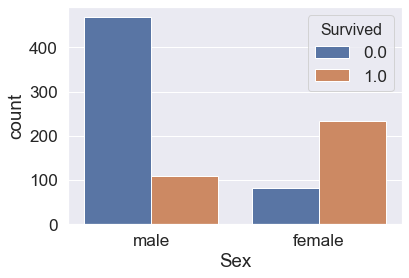

In [8]:
#性別和生存率的關係
sns.countplot(df_data['Sex'], hue=df_data['Survived'])
display(df_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().round(3))

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


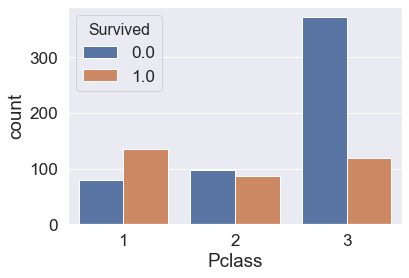

In [9]:
#艙等和生存率的關係
sns.countplot(df_data['Pclass'], hue=df_data['Survived'])
df_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().round(3)

In [11]:
#類別變數轉換-性別
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

In [12]:
#分割訓練資料與測試資料
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

In [13]:
df_train.shape

(891, 13)

In [14]:
df_test.shape

(418, 13)

In [15]:
#定義特徵變數與目標變數
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [16]:
df_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Sex_Code
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,1
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,1
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,0


In [21]:
# modeling
Base = ['Sex_Code','Pclass']
Base_Model = RandomForestClassifier(random_state=2,
                                    n_estimators=250, #幾棵樹
                                    min_samples_split=20,
                                    oob_score=True)

In [24]:
X[Base]

,Sex_Code,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,1,3
889,0,1


In [22]:
# Training and fitting
Base_Model.fit(X[Base] , Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))


#僅用性別和艙等作為模型訓練資料
#在OOB上獲得0.73176的準確率，這是一個基準值

Base oob score :0.73176


In [ ]:
#再深入探討，看能不能再提高模型表現

Fare        
Survived    0.0     1.0
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

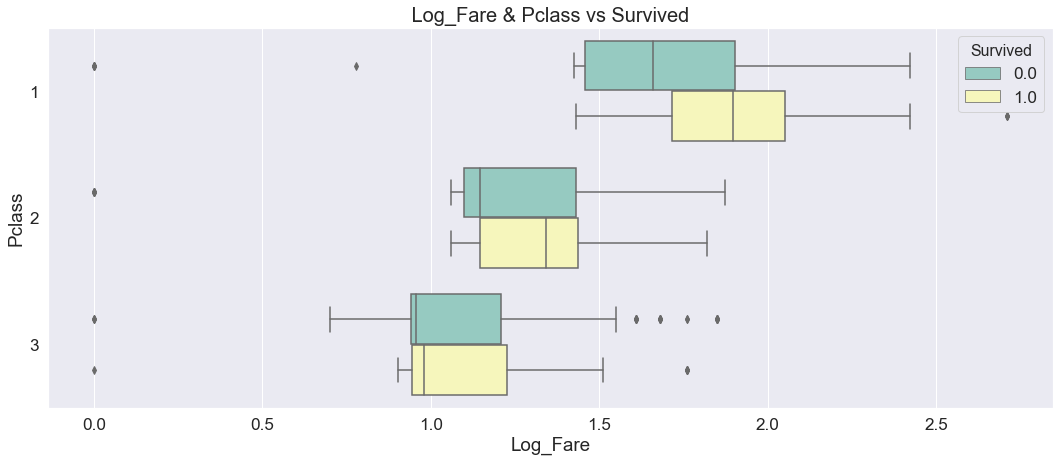

In [26]:
# there is some bugs in log-scale of boxplot. 
# alternatively, we transform x into log10(x) for visualization.

df_data['Log_Fare'] = (df_data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)

fig, ax = plt.subplots( figsize = (18,7) )

sns.boxplot(y='Pclass', 
            x='Log_Fare',
            hue='Survived',data=df_data, 
            orient='h',
            ax=ax,
            palette="Set3")


ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)

pd.pivot_table(df_data,
               values = ['Fare'], 
               index = ['Pclass'], 
               columns= ['Survived'] ,
               aggfunc = 'median' ).round(3)



In [29]:
df_data.info() #票價只有一個遺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Sex_Code       1309 non-null int32
Log_Fare       1309 non-null float64
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 188.3+ KB


In [30]:
# Filling missing values
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].median())


In [32]:
#嘗試測試看看'票價'此一特徵

#將票價分別切分成4,5,6的區間
#qcut以累積百分比來切分
df_data['FareBin_4'] = pd.qcut(df_data['Fare'], 4)
df_data['FareBin_5'] = pd.qcut(df_data['Fare'], 5)
df_data['FareBin_6'] = pd.qcut(df_data['Fare'], 6)


In [33]:
label = LabelEncoder()
df_data['FareBin_Code_4'] = label.fit_transform(df_data['FareBin_4'])
df_data['FareBin_Code_5'] = label.fit_transform(df_data['FareBin_5'])
df_data['FareBin_Code_6'] = label.fit_transform(df_data['FareBin_6'])


In [34]:
# cross tab
df_4 = pd.crosstab(df_data['FareBin_Code_4'],df_data['Pclass'])
df_5 = pd.crosstab(df_data['FareBin_Code_5'],df_data['Pclass'])
df_6 = pd.crosstab(df_data['FareBin_Code_6'],df_data['Pclass'])

display_side_by_side(df_4,df_5,df_6)

Pclass,1,2,3
FareBin_Code_4,,,
0,8,6,323
1,0,128,193
2,77,104,147
3,238,39,46
Pclass,1,2,3
FareBin_Code_5,,,
0,8,6,261
1,0,36,218
2,0,124,132


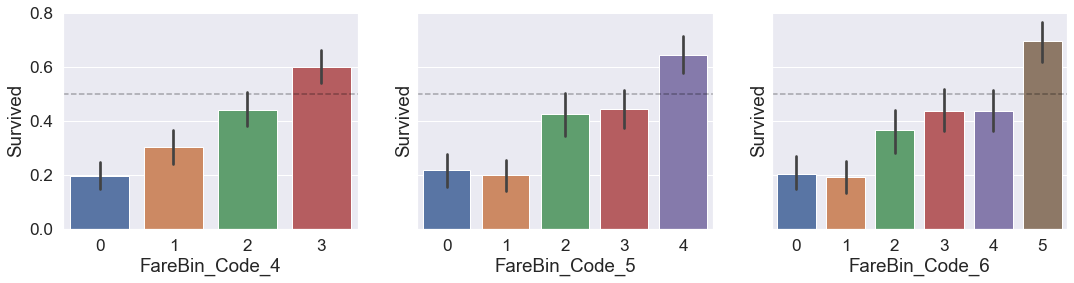

In [35]:
# plots
fig, [ax1, ax2, ax3] = plt.subplots(1, 3,sharey=True)

fig.set_figwidth(18)

for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5,linestyle='dashed', c='black',alpha = .3)
g1 = sns.factorplot(x='FareBin_Code_4', y="Survived", data=df_data,kind='bar',ax=ax1)
g2 = sns.factorplot(x='FareBin_Code_5', y="Survived", data=df_data,kind='bar',ax=ax2)
g3 = sns.factorplot(x='FareBin_Code_6', y="Survived", data=df_data,kind='bar',ax=ax3)

# close FacetGrid object
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)

#生存率 vs 票價區間，分別切成4, 5, 6個區間，上下的黑線為95%信賴區間
#圖中虛線表示為機器隨機亂猜，應該要有50%的準確率

In [36]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]


In [37]:
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

# show columns
X.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Ticket', 'Sex_Code', 'Log_Fare', 'FareBin_4', 'FareBin_5',
       'FareBin_6', 'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6'],
      dtype='object')

In [39]:
#利用前向選擇法(RFE)做特徵選擇

compare = ['Sex_Code','Pclass','FareBin_Code_4','FareBin_Code_5','FareBin_Code_6']

selector = RFECV(
    RandomForestClassifier(n_estimators=250,min_samples_split=20),
    cv=10,
    n_jobs=-1)

selector.fit(X[compare], Y)

print(selector.support_)
print(selector.ranking_)
print(selector.grid_scores_*100)

[ True  True  True  True  True]
[1 1 1 1 1]
[78.66981614 77.33398593 79.46260356 79.24293497 80.25544774]


In [41]:
score_b4,score_b5, score_b6 = [], [], []

seeds = 10

for i in range(seeds):
    
    diff_cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=i)
    
    selector = RFECV(RandomForestClassifier(random_state=i,n_estimators=250,min_samples_split=20),
                     cv=diff_cv,
                     n_jobs=-1)
    
    selector.fit(X[compare], Y)
    
    score_b4.append(selector.grid_scores_[2])
    score_b5.append(selector.grid_scores_[3])
    score_b6.append(selector.grid_scores_[4])

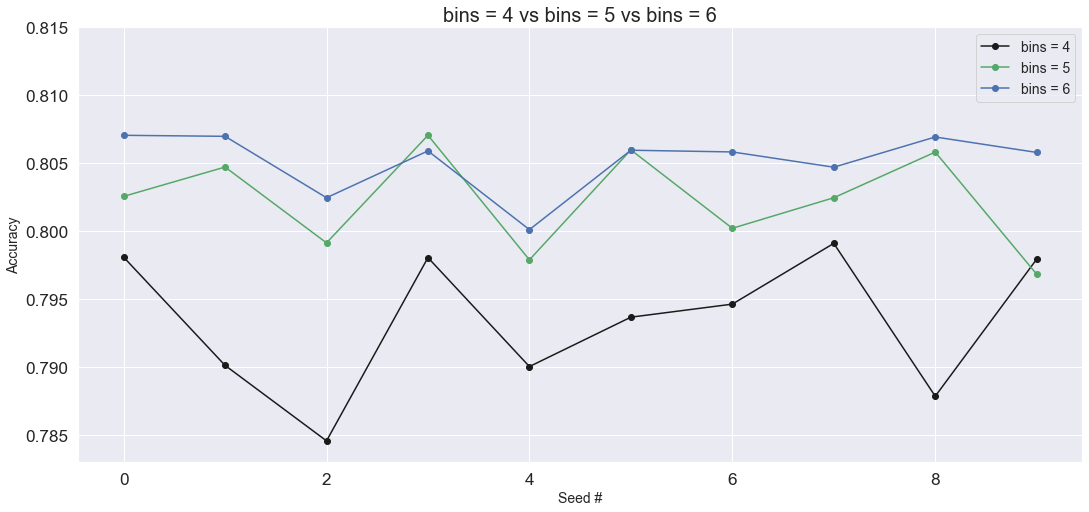

In [42]:
# to np.array
score_list = [score_b4, score_b5, score_b6]

for item in score_list:
    item = np.array(item*100)

# plot
fig = plt.figure(figsize= (18,8) )
ax = plt.gca()
ax.plot(range(seeds), score_b4,'-ok',label='bins = 4')
ax.plot(range(seeds), score_b5,'-og',label='bins = 5')
ax.plot(range(seeds), score_b6,'-ob',label='bins = 6')
ax.set_xlabel("Seed #", fontsize = '14')
ax.set_ylim(0.783,0.815)
ax.set_ylabel("Accuracy", fontsize = '14')
ax.set_title('bins = 4 vs bins = 5 vs bins = 6', fontsize='20')
plt.legend(fontsize = 14,loc='upper right')

In [46]:
b4, b5, b6 = ['Sex_Code', 'Pclass','FareBin_Code_4'], ['Sex_Code','Pclass','FareBin_Code_5'],\
['Sex_Code','Pclass','FareBin_Code_6']

b4_Model = RandomForestClassifier(
    random_state=2,
    n_estimators=250,
    min_samples_split=20,
    oob_score=True)

b4_Model.fit(X[b4], Y)

b5_Model = RandomForestClassifier(
    random_state=2,
    n_estimators=250,
    min_samples_split=20,
    oob_score=True)

b5_Model.fit(X[b5], Y)

b6_Model = RandomForestClassifier(
    random_state=2,
    n_estimators=250,
    min_samples_split=20,
    oob_score=True)

b6_Model.fit(X[b6], Y)

print('b4 oob score :%.5f' %(b4_Model.oob_score_),'   LB_Public : 0.7790')
print('b5 oob score :%.5f '%(b5_Model.oob_score_),' LB_Public : 0.79425')
print('b6 oob score : %.5f' %(b6_Model.oob_score_), '  LB_Public : 0.77033')

b4 oob score :0.80584    LB_Public : 0.7790
b5 oob score :0.81033   LB_Public : 0.79425
b6 oob score : 0.80135   LB_Public : 0.77033


In [ ]:
#b5_Model可以得到0.79425的準確率

In [ ]:
#再嘗試看看能不能繼續提升準確率
#連結(Connected_Survival)

In [47]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
Age               1046 non-null float64
Cabin             295 non-null object
Embarked          1307 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null object
SibSp             1309 non-null int64
Survived          891 non-null float64
Ticket            1309 non-null object
Sex_Code          1309 non-null int32
Log_Fare          1309 non-null float64
FareBin_4         1309 non-null category
FareBin_5         1309 non-null category
FareBin_6         1309 non-null category
FareBin_Code_4    1309 non-null int32
FareBin_Code_5    1309 non-null int32
FareBin_Code_6    1309 non-null int32
Family_size       1309 non-null int64
dtypes: category(3), float64(4), int32(4), int64(5), object(5)
memory usage:

In [50]:
# Family_size
#兄弟姊妹數SibSp+父母小孩數Parch+1
df_data['Family_size'] = df_data['SibSp'] + df_data['Parch'] + 1

In [71]:
#建立持有相同票根的DataFrame

deplicate_ticket = []

for tk in df_data.Ticket.unique():
    
    tem = df_data.loc[df_data.Ticket == tk, 'Fare']
    #print(tem)
    
    if tem.count() > 1:
        deplicate_ticket.append(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare','Cabin','Family_size','Survived']])

        
deplicate_ticket = pd.concat(deplicate_ticket)

deplicate_ticket.head(14)

,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
234,"Cumings, Mr. John Bradley",PC 17599,71.2833,C85,2,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
146,"Hilliard, Mr. Herbert Henry",17463,51.8625,E46,1,NaN
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


In [72]:
# Family_size = 1 但是又在群組內的，即非親屬關係，我們歸類為朋友
# Family_size > 1則為家人

df_fri = deplicate_ticket.loc[(deplicate_ticket.Family_size == 1) & (deplicate_ticket.Survived.notnull())].head(7)
df_fami = deplicate_ticket.loc[(deplicate_ticket.Family_size > 1) & (deplicate_ticket.Survived.notnull())].head(7)

display(df_fri,df_fami)

print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print('friends: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size == 1]))
print('families: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size > 1]))

,Name,Ticket,Fare,Cabin,Family_size,Survived
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
20,"Fynney, Mr. Joseph J",239865,26.0000,NaN,1,0.0
791,"Gaskell, Mr. Alfred",239865,26.0000,NaN,1,0.0
195,"Lurette, Miss. Elise",PC 17569,146.5208,B80,1,1.0
681,"Hassab, Mr. Hammad",PC 17572,76.7292,D49,1,1.0
61,"Icard, Miss. Amelie",113572,80.0000,B28,1,1.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",113572,80.0000,B28,1,1.0


,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


people keep the same ticket: 596 
friends: 127 
families: 469 


In [73]:
df_data['Connected_Survival'] = 0.5   #沒有生還資訊，定義Connected_Survival = 0.5 

for _, df_grp in df_data.groupby('Ticket'):
    if (len(df_grp) > 1):  #過濾出重複的票根
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):  #如果群組中有人生還，則定義 Connected_Survival = 1
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (smin==0.0):  #沒有人生還，則定義Connected_Survival = 0
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0

                
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print("people have connected information : %.0f" 
      %(df_data[df_data['Connected_Survival']!=0.5].shape[0]))

df_data.groupby('Connected_Survival')[['Survived']].mean().round(3)

people keep the same ticket: 596 
people have connected information : 496


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


In [74]:
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [75]:
connect = ['Sex_Code','Pclass','FareBin_Code_5','Connected_Survival']

connect_Model = RandomForestClassifier(
    random_state=2,
    n_estimators=250,
    min_samples_split=20,
    oob_score=True)

connect_Model.fit(X[connect], Y)

print('connect oob score :%.5f' %(connect_Model.oob_score_))

connect oob score :0.82043


In [ ]:
#oob score來到了0.820
#繼續提升表現看看
#年齡

Sex,female,male,All
Has_Age,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


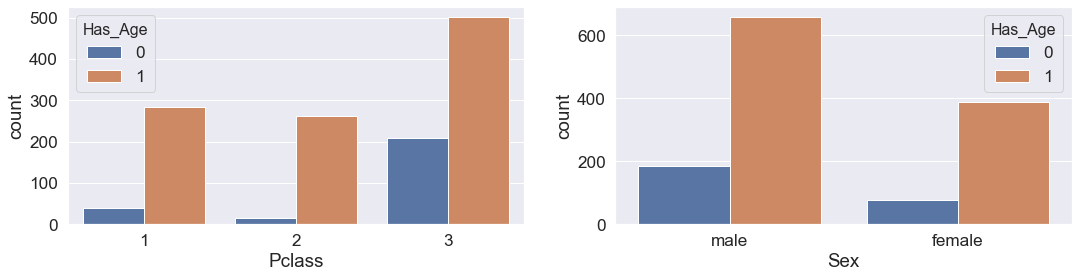

In [76]:
#觀察遺失值分布情況

df_data['Has_Age'] = df_data['Age'].isnull().map(lambda x : 0 if x == True else 1)

fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(18)
ax1 = sns.countplot(df_data['Pclass'],hue=df_data['Has_Age'],ax=ax1)
ax2 = sns.countplot(df_data['Sex'],hue=df_data['Has_Age'],ax=ax2)

pd.crosstab(df_data['Has_Age'],df_data['Sex'],margins=True).round(3)

Text(0.5, 1.0, 'Age vs Survived in Pclass = 1 and  2')

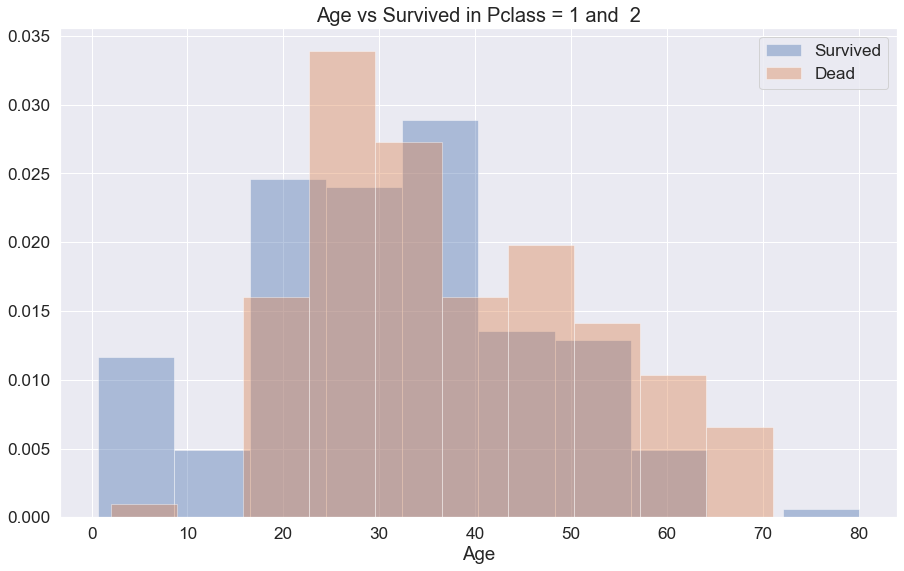

In [77]:
#1,2艙之中，年齡對存活與否的影響

# Masks
Mask_Has_Age_P12_Survived = ( (df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 1) )
Mask_Has_Age_P12_Dead = ( (df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 0) )

# Plot
fig, ax = plt.subplots( figsize = (15,9) )
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Survived, 'Age'],kde=False,bins=10,norm_hist=True,label='Survived') 
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Dead, 'Age'],kde=False,bins=10,norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and  2',fontsize = 20)

In [ ]:
#年齡這個特徵可以抽取出<16歲及>16歲做為一個二元特徵

In [78]:
# extracted title using name
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Title'] = df_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Title'] = df_data['Title'].replace(['Lady'],'Mrs')
df_data['Title'] = df_data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })


In [80]:
df_data['Title']

0      0
1      4
2      3
3      4
4      0
      ..
413    0
414    1
415    0
416    0
417    2
Name: Title, Length: 1309, dtype: int64

In [79]:
#填入缺失值的方式我們選擇使用姓名當中的稱謂中位數來填補
Ti = df_data.groupby('Title')['Age'].median()
Ti


Title
0    29.0
1    47.0
2     4.0
3    22.0
4    36.0
Name: Age, dtype: float64

In [ ]:
#列表為年齡中位數，先生 - 29歲，罕見稱謂 - 47歲，小男孩 - 4歲，小姐- 22歲， 女士 - 36歲

In [84]:
#創建Ti_Age，分為<16歲及>16歲，命名為Ti_Minor
Ti_pred = df_data.groupby('Title')['Age'].median().values
df_data['Ti_Age'] = df_data['Age']

# Filling the missing age
for i in range(0,5):
    df_data.loc[(df_data.Age.isnull()) & (df_data.Title == i),'Ti_Age'] = Ti_pred[i]

df_data['Ti_Age'] = df_data['Ti_Age'].astype('int')

df_data['Ti_Minor'] = ((df_data['Ti_Age']) < 16.0) * 1

In [85]:
df_data['Ti_Age']

0      22
1      38
2      26
3      35
4      35
       ..
413    29
414    39
415    38
416    29
417     4
Name: Ti_Age, Length: 1309, dtype: int32

In [86]:
df_data['Ti_Minor']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    1
Name: Ti_Minor, Length: 1309, dtype: int32

In [87]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [88]:
# Training
minor = ['Sex_Code','Pclass','FareBin_Code_5','Connected_Survival','Ti_Minor']
minor_Model = RandomForestClassifier(
    random_state=2,
    n_estimators=250,
    min_samples_split=20,
    oob_score=True)

minor_Model.fit(X[minor], Y)

print('minor oob score :%.5f' %(minor_Model.oob_score_))

minor oob score :0.84175


In [ ]:
#得到了0.8417的oob score